<font face="Times New Roman" size="3">
<hr style="width:100%;height:2px;color:black">
<div style="width:100%">
    <div style="float:left;width:50%">Albert-Ludwigs-Universität Freiburg</div>
    <div style="float:left;width:50%;text-align:right">Wintersemester 2022/23</div> 
</div>
<div style="clear:both;text-align:center">
    <h1 style="margin-top:20px;padding:0px">Datenanalyse für Naturwissenschaftler*Innen</h1>
    <h2 style="margin:5px;padding:0px">Statistische Methoden in Theorie und Praxis</h2>
    Vorlesung: Dr. Andrea Knue<br />
    Übungsleitung: Dr. Constantin Heidegger<br />
    <h1 style="margin:10px;padding:0px">Musterlösung 5</h1>
    Ausgabe: 18. November 2022 10:00 Uhr, Abgabe: 25. November 2022 bis 10:00 Uhr via Ilias
</div>
<hr style="font-family:width:100%;height:2px;color:black">
</font>

<font face="Times New Roman" size=3>
    <h3 style="margin:0px">Einführungsaufgabe: Gaussverteilung darstellen</h3>
</font>

Bevor wir mit der eigentlichen Aufgabe 4 beginnen, wollen wir uns zunächst dem "Würfeln" (= Erzeugen einer Verteilung durch die Generierung von Zufallszahlen) und Darstellen der Gaussverteilung widmen.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

Dazu erstellen wir zunächst eine Funktion `gauss` mit der wir die Gaussfunktion
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right)$$ 
implementieren können.

In [2]:
def gauss(x, n, sig, mu):   
    return n/(np.sqrt(2*np.pi)*sig) * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


Mann kann in der Funktion sogenanntes type hinting (https://peps.python.org/pep-0484/ ab python version 3.6) verwenden. Dabei gib man an welchen daten typ die Variablen haben die der Funktion übergeben werden. Und hinter -> steht was von der Funktion zurück gegben wird. type hinting ist hier nur implementiert, damit die Funktionen und was sie tun verständlicher werden. Es ist nicht nötig um die Aufgaben richtig zu lösen. Für die Funktion gauss() so aus: 

In [3]:
# die folgende syntax funktioniert bei deiner Python version ggf. nicht. Darum ist sie auskommentiert.
# man kann damit trotzdem gut erklären was die Funktion gauss macht.
# An x kann also ein int, ein float oder ein np.array uebergeben werden.
# Und an n, sig und mu ein int oder ein float.  
# Zurück gegeben wird entweder ein np.float (wenn x nur ein Wert ist) oder ein np.array wenn x ein np.array ist.
"""
def gauss(x: (int | float | np.ndarray), 
            n: (int|float), sig: (int|float), mu: (int|float)) -> (np.float|np.ndarray):   
    return n/(np.sqrt(2*np.pi)*sig) * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
"""

'\ndef gauss(x: (int | float | np.ndarray), \n            n: (int|float), sig: (int|float), mu: (int|float)) -> (np.float|np.ndarray):   \n    return n/(np.sqrt(2*np.pi)*sig) * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))\n'

Nun wollen wir Zufallszahlen generieren, die einer Verteilung genügen die dieser Funktion entspricht. Mit `numpy` ist das ganz einfach, denn diese Bibliothek enthält bereits eine Methode dafür, und zwar `normal` im Modul `random`. Wir generieren uns also eine Liste `x` mit 10000 normal-verteilte Zufallszahlen mit $\mu=5$ und $\sigma=1$:  

random.normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

Parameters

    loc: float or array_like of floats

        Mean (“centre”) of the distribution.
    scale: float or array_like of floats

        Standard deviation (spread or “width”) of the distribution. Must be non-negative.
    size: int or tuple of ints, optional

        Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

Returns

    out: ndarray or scalar

        Drawn samples from the parameterized normal distribution.



In [4]:
x = np.random.normal(5, 1, 10000)
print(x)
print(f'the shape of x is {x.shape}')

[3.76837122 3.44745117 5.74609938 ... 5.05267136 5.18038666 4.58143388]
the shape of x is (10000,)


Wir möchten nun sehen, wie gut (oder schlecht?) unsere Verteilung der obigen Funktion genügt. Das erkennt man üblicherweise dann am besten, wenn man es grafisch darstellt. Wir möchten also ein Diagramm erstellen mit der gewürfelten Verteilung als Histogramm und darüberliegend den Verlauf der tatsächlichen Gauss-Funktion. Wir wählen dazu das Intervall $x\in[0,10]$.

Zunächst brauchen wir eine Methode mit der wir die Liste der Bingrenzen definieren können in Abhängigkeit der Intervallgrenzen und der Anzahl gleichmäßig breiter Bins:

In [5]:
def listOfBins(xmin:float, xmax:float, nbins:int) -> list:
    return [xmin+(xmax-xmin)/nbins*i for i in range(nbins+1)] ## +1 since we need the upper bound as well

#alternativ:
def listOfBins(xmin:float, xmax:float, nbins:int) -> np.ndarray:
    return np.linspace(xmin, xmax, nbins+1) ## +1 since we need the upper bound as well

In [6]:
bins1 = listOfBins(0, 10, 10)
print(bins1) 

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [7]:
bins2 = listOfBins(2, 12, 10)
print(bins2) 

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


In [8]:
bins3 = listOfBins(2, 12, 40)
#print(bins3) 

Nun können wir das `pyplot` Histogramm bauen, in der wir die normal-verteilen Zufallswerte darstellen möchten. Das geht ganz einfach über die Funktion `hist`, der wir die Zufallszahlen und die Bingrenzen als Argumente übergeben. Wir verwenden 40 Bins von 0 bis 10. (Sie können mit den Anzahl Bins herumexperimentieren und um zu sehen, wie sich die Auflösung der Verteilung verändert.)

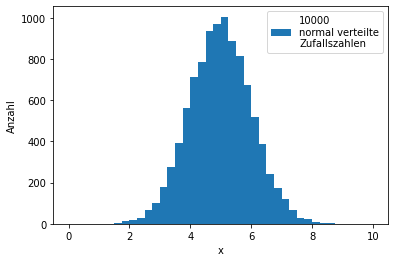

In [9]:
b = listOfBins(0, 10, 40)
plt.hist(x, bins=b, label=f"{len(x)}\nnormal verteilte\nZufallszahlen")
plt.xlabel('x')
plt.ylabel('Anzahl')
plt.legend()
plt.show()

Nun möchten wir die Gaussfunktion $f(x)$ darüberlegen um den Unterschied der zufallsgenerierten Verteilung feststellen zu können. Dazu verwenden wir die Funktion `plot` die mit $x$ und $y=f(x)$ Werten gefüttert werden muss. Tatsächlich wird nicht eine Funktion gezeichnet sondern die Funktion wird an einzelnen Punkten (die wir als $x$ Werte vorgeben) ausgewertet und die Punkte dann miteinander verbunden. Je mehr punkte wir also übergeben, desto genauer und schöner wir die Kurve (wobei ab einer gewissen Anzahl Punkte keine Verbesserung mehr bei zusätzlichen Punkten feststellbar ist). Wir wählen 40 Punkte und lassen uns durch `numpy`'s Funktion `linspace` eine Liste von gleichmäßigen $x$ Positionen generieren (auch wieder im Intervall $[0,10]$): 

numpy linspace dokumentation: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html  
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)

Return evenly spaced numbers over a specified interval.  

Parameters

    start: array_like
        The starting value of the sequence.

    stop: array_like
        The end value of the sequence, unless endpoint is set to False. In that case, the sequence consists of all but the last of num + 1 evenly spaced samples, so that stop is excluded. Note that the step size changes when endpoint is False.

    num: int, optional
        Number of samples to generate. Default is 50. Must be non-negative.

    endpoint: bool, optional
        If True, stop is the last sample. Otherwise, it is not included. Default is True.
    
    retstep: bool, optional
        If True, return (samples, step), where step is the spacing between samples.
    
    dtype: dtype, optional
        The type of the output array. If dtype is not given, the data type is inferred from start and stop. The inferred dtype will never be an integer; float is chosen even if the arguments would produce an array of integers.

        New in version 1.9.0.

    axis: int, optional
        The axis in the result to store the samples. Relevant only if start or stop are array-like. By default (0), the samples will be along a new axis inserted at the beginning. Use -1 to get an axis at the end.

        New in version 1.16.0.

Returns

    samples: ndarray
        There are num equally spaced samples in the closed interval [start, stop] or the half-open interval [start, stop) (depending on whether endpoint is True or False).


In [10]:
xpos = np.linspace(0, 10, 40+1)
xpos

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  ])

Nun werten wir die Funktion an diesen Punkten aus und stellen $f(x)$ dar:

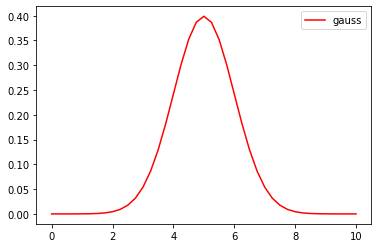

In [11]:
plt.plot(xpos, gauss(xpos, 1, 1, 5), color="red", label="gauss")
plt.legend()
plt.show()

Die beiden Diagramme sollen nun allerdings übereinander dargestellt werden. Das erreichen wir, indem wir die beiden Befehle in einer gemeinsamen Zelle nacheinander ausführen.

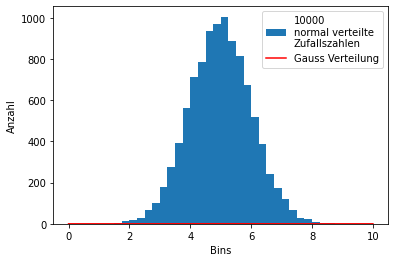

In [12]:
b = listOfBins(0, 10, 40)
plt.hist(x, bins=b, label=f"{len(x)}\nnormal verteilte\nZufallszahlen")
plt.xlabel('Bins')
plt.ylabel('Anzahl')
plt.plot(xpos, gauss(xpos, 1, 1, 5), color="red", label="Gauss Verteilung")
plt.legend()
plt.show()

Was ist hier passiert? Die Kurve für $f(x)$ ist nicht mehr sichtbar! Das liegt daran, dass die Normalisierung der beiden Diagramme gegeneinander nicht passt. Gehen Sie nochmal zurück zu den Einzeldiagrammen und achten Sie auf die Werte auf der $y$ Achse. Wir müssen also eines der Diagramme anpassen.   
    Entweder das Histogramm indem wir die Einträge jedes Bins normalisieren, sodass das Integral (die summe aller Einträge) gleich 1 ist.  
    Oder wir skalieren die Darstellung von $f(x)$ nach oben, sodass das Integral von $f(x)$ dem Integral des Histogramms entspricht. Wir entscheiden uns für letzteres, da die Funktion `gauss` bereits einen Parameter `n` zur Skalierung enthält.  
    Den setzen wir auf das Maximum des Histogramms. Dazu lassen wir uns die Binhöhen des Histogramms in `bh` zurückgeben. Bemerke, dass die Funktion `hist` drei Rückgabewerte hat (siehe https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), wobei wir die anderen beiden aber nicht brauchen. Daraus berechnen wir `n` als das Integral des Histogramms dividiert durch `4` (da wir 40 bins für das Intervall $x\in[0,10]$ verwenden). 

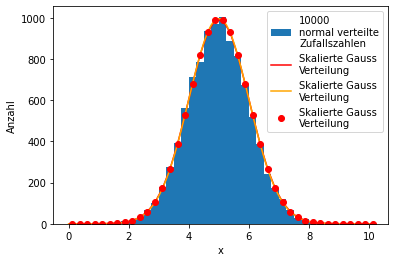

In [13]:
xmin = 0
xmax = 10
nbins = 40
b = listOfBins(xmin, xmax, nbins)
bh,bx,pt = plt.hist(x, bins=b, label=f"{len(x)}\nnormal verteilte\nZufallszahlen")
# berechne den Skalierungsfaktor
ymax = sum(bh) * (xmax-xmin) / nbins
# kreiere x array um gauss() zu plotten
# um das Histogramm mit der Funktion yu vergleichen
# kann die Funktion an der Binmitte evaluiert werden
# um die Binmitte zu berechnen muss erst die halbe Binbreite berechnet werden:
half_bin_width = (b[1]-b[0]) / 2
# daraus folgen die x positionen an denen die Funktion ausgewertet wird
xpos = b + half_bin_width
# Nebenbemerkung: xpos hat die gleiche Länge wie b 
# --> folglich liegt der größte Wert von xpos um einen halben Bin außerhalb des Binintervalls
# das lässt sich einfach mit xpos = bins[:-1] + half_bin_width beheben.
# ist aber auch nicht zwinged notwenig um den Plot zu erstellen.
plt.plot(xpos, gauss(xpos, ymax, 1, 5),
        color="red", label="Skalierte Gauss\nVerteilung")
# für eine smoothere Kurve kann man mehr x werte verwenden
xpos2 = np.linspace(xmin, xmax, 100)
plt.plot(xpos2, gauss(xpos2, ymax, 1, 5), 
        color="orange", label="Skalierte Gauss\nVerteilung")
# check ob xpos wirklich die bin mitten sind 'o' verwenden
plt.plot(xpos, gauss(xpos, ymax, 1, 5), 'o',
        color="red", label="Skalierte Gauss\nVerteilung")
plt.xlabel('x')
plt.ylabel('Anzahl')
plt.legend(loc='best')
plt.show()

Die Abbildung sieht nun also genau so aus, wie wir es erwarten würden. Allerdings fehlen noch entscheidende Dinge. Und zwar die Bezeichnungen! Ein Diagramm ohne Bezeichnung ist sinnlos, da wir nicht wissen, welche Werte wir herauslesen können. Wir fügen nun also Achsenbezeichnungen und Ticks hinzu, damit das Diagramm lesbar wird. Diese Labels sollten standardmäßig zu jedem Diagramm hinzugefügt werden! Zudem schreiben wir noch $\mu$ und $\sigma$ in den Titel, damit wir wissen welche Parameter an die Funktion übergeben wurde.

Außerdem bringen wir nun auch alles in einer Funktion zusammen, sodass wir einfach verschiedene Werte ausprobieren können.

In [14]:
def plotGauss(name:str, xmin:float, xmax:float, nbins:int, mu:float, sig:float):
    # create 10000 normal distributed random numbers
    x = np.random.normal(mu, sig, 10000)
    # create bins
    bins = listOfBins(xmin, xmax, nbins)
    # plot data
    bh,bx,pt = plt.hist(x, bins=bins)
    # calculate normalzing factor
    ymax = sum(bh) * (xmax-xmin) / nbins
    # create x array and plot function gauss()
    # we want to evaluate the gauss function at the bin middle
    # use half bin width to calculate bin middle.
    half_bin_width = (bins[1]-bins[0]) / 2
    xpos = bins + half_bin_width
    xpos = np.linspace(xmin, xmax, 1000)
    # Sidenote: this array has the same length as b 
    # --> it exceeds the upperbound of bins by half a bin length.
    # one can fix this with xpos = bins[:-1] + half_bin_width
    # however this is not necessary to create the plot
    plt.plot(xpos, gauss(xpos, ymax, sig, mu) ,color="red")

    ## let's make this plot nicer:
    plt.xlabel("x", fontsize=13)
    plt.ylabel("y", fontsize=13)
    plt.xlim(xmin, xmax)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    # add the title
    titel = rf"{name} $\mu=${mu} $\sigma=${sig}"
    plt.title(titel)
    plt.show()

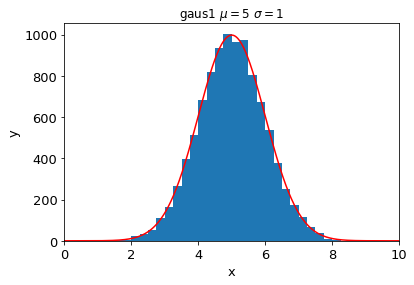

In [15]:
plotGauss("gaus1", 0, 10, 40, 5, 1)

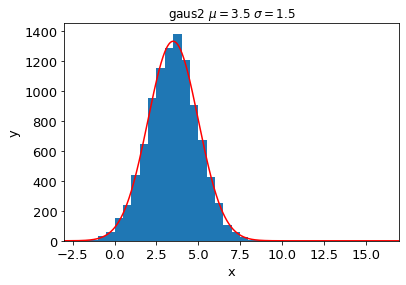

In [16]:
plotGauss("gaus2", -3, 17, 40, 3.5, 1.5)

<hr style="font-family:width:100%;height:2px;color:black">

<font face="Times New Roman" size=3>
    <h3 style="margin:0px">Aufgabe 3: Binomial- und Poissonverteilungen (8P)</h3>
</font>

In dieser Aufgabe wollen wir testen, ob die Binomial- und Poissonverteilungen sich für große Stichprobengrößen $n$ tatsächlich an die Gaussverteilung annähern.

<font face="Times New Roman" size=4>
a) Binomialverteilung (6P)
</font>

Befüllen Sie ein Histogramm mit 1M nach der Binomialverteilung verteilten diskreten Zufallsvariablen $x$ für $p=0.6$ und der Anzahl von Versuchen $n$ (s. Vorlesung). Um den Wertebereich von $x$ festzulegen der gezeigt werden soll, berechnen Sie mit Hilfe der Standardabweichung der Binomialverteilung die Grenzen des $4\sigma$ Bereiches um den Mittelwert der Verteilung.  Zeichnen Sie die Gaussfunktion mit geeigneten Werten von $\mu$ und $\sigma$ darüber. Geben Sie außerdem den Unterschied zwischen den beiden Verteilungen an indem Sie die Differenzen (Achtung: jeweils die Absolutbeträge der Differenzen!) der Binhöhe und der Werte der Gaussfunktion an jedem Binmittelpunkt aufsummieren und durch das Integral der Gaussfunktion teilen (also Sie berechnen die relative Abweichung der Verteilung im Histogramm in Bezug auf die Normalverteilung). Testen Sie verschiedene Werte für die Anzahl der Versuche $n$. Wie groß muss $n$ sein, damit die Abweichung kleiner als 20% ist? 

In [17]:
def diff(bh : list, bx : list, func) -> float:
    """ this function calculates the difference between a 
    histogram and a function"""
    d = 0
    for i in range(len(bh)):
        bmiddle = bx[i] + (bx[i+1]-bx[i]) / 2 ## bin center along x axis
        d += abs(func(bmiddle) - bh[i])
    return d


In [18]:
def plot_binom_vs_gauss(n : int, p = 0.6, 
                        N = 1000000, plot = True):
    """
    fills a histrogramm with random binomial distributed numbers
    and compares the histogramm to a gaussian distribution
    """
    ## binomial distributed
    # create random binomial distributed data 
    x = np.random.binomial(n, p, N)
    # with bins between [$\mu$ - 4$\sigma$, $\mu$ + 4$\sigma$]
    binom_mu = n*p
    binom_sigma = math.sqrt(n*p*(1-p))
    xmin = round(binom_mu - 4*binom_sigma, 0)
    xmax = round(binom_mu + 4*binom_sigma, 0) 
    nbins = int(xmax-xmin)
    bins = listOfBins(xmin, xmax, nbins)
    # and plot binomial distribution as histogramm
    bh,bx,pt = plt.hist(x, bins=bins, label=f"trials: {n}")
    
    ## gaussian distribution
    # calculate sum(bh) to normalize Gaussian
    # ymax = sum(bh) * (xmax-xmin) / nbins
    # because  (xmax-xmin) / nbins = 1 we end up with:
    ymax = sum(bh)
    # calculate the half bin width
    half_bin_width = (bins[1]-bins[0]) / 2
    xpos = bins[:-1] + half_bin_width
    ypos = gauss(xpos, ymax, binom_sigma, binom_mu)
    plt.plot(xpos, ypos, color="red")
    ## calc difference between histogramm and gauss
    difference = diff(bh, bx, lambda x: gauss(x, ymax, binom_sigma, binom_mu)) / ymax
    ## make plot nice
    plt.xlabel("x", fontsize=13)
    plt.ylabel("y", fontsize=13)
    #plt.xlim(np.min(bins), np.max(bins))
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    titel = (f'binomial distribution \n p={p} tested {N} times\n')
             #f'the difference to a gaussian is {difference:.2f}')
    plt.title(titel)
    ## show plot
    if plot:
        plt.legend()
        plt.show()
    #print("ymax = ",ymax)
    return difference


when n=2 the difference is 52.1%
when n=3 the difference is 50.1%
when n=4 the difference is 43.6%
when n=5 the difference is 36.9%
when n=6 the difference is 36.2%
when n=7 the difference is 31.5%
when n=8 the difference is 30.4%
when n=9 the difference is 29.1%
when n=10 the difference is 26.8%
when n=11 the difference is 26.4%
when n=12 the difference is 24.5%
when n=13 the difference is 24.0%
when n=14 the difference is 23.3%
when n=15 the difference is 22.0%
when n=16 the difference is 21.6%
when n=17 the difference is 20.7%
when n=18 the difference is 20.4%
when n=19 the difference is 20.0%


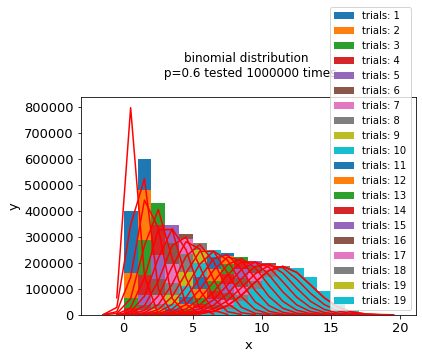

when n=19 the difference is 0.1991055569976139


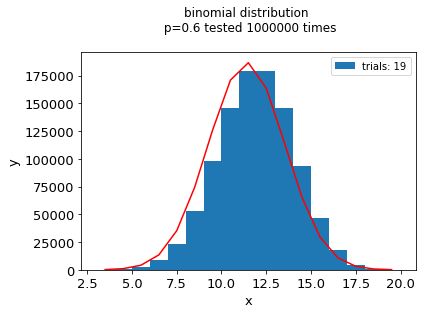

In [19]:
# we start with one trial
n = 1
difference = plot_binom_vs_gauss(n, plot=False)

# we use a while loop to find the right n
while difference > 0.2:
    n = n+1    # update counter
    difference = plot_binom_vs_gauss(n, plot=False)
    print(f"when n={n} the difference is {difference*100:.1f}%")

# because the functions plot_binom_vs_gauss adds the plots to the figure
# using plot_binom_vs_gauss(n, plot=True) shows the histogramms and 
# gaussian distributions for all the n used in the loop 
difference = plot_binom_vs_gauss(n, plot=True)
print(f"when n={n} the difference is {difference}")
# using the function again shows one distribution for a given n
difference = plot_binom_vs_gauss(n)

<font face="Times New Roman" size=4>
b) Poissonverteilung (2P)
</font>

Wiederholen Sie Aufgabenteil (a) für die Poissonverteilung. Wiederum die Frage: wie groß muss $\nu$ sein damit der relative Fehler kleiner als 20% ist? 

In [20]:
def plot_poisson_vs_gauss(nu : float, N : int = 1000000, 
                            plot : bool = True) -> float:
    """
    fills a histrogramm with random poisson distributed numbers
    and compares the histogramm to a gaussian distribution
    """
    ## binomial distribution
    # create random binomial distributed data and bins between 
    #[$\nu$ - 4$\sigma$, $\nu$ + 4$\sigma$]
    poisson_sigma = math.sqrt(nu)
    xmin = round(nu - 4*poisson_sigma, 0)
    xmax = round(nu + 4*poisson_sigma, 0) 
    nbins = int(xmax-xmin)
    x = np.random.poisson(nu, N)
    bins = listOfBins(xmin, xmax, nbins)
    # plot binomial distribution
    bh,bx,pt = plt.hist(x, bins=bins, label=rf"$\nu=${nu}")

    ## gaussian distribution
    # calculate normalizing factor
    ymax = sum(bh)
    # calculate the half bin width
    half_bin_width = (bins[1]-bins[0]) / 2
    # xpos at bin centers
    xpos = bins[:-1] + half_bin_width
    ypos = gauss(xpos, ymax, poisson_sigma, nu)
    plt.plot(xpos, ypos, color="red")
    ## calc difference between histogramm and gauss
    difference = diff(bh, bx, lambda x: gauss(x, ymax, math.sqrt(nu), nu)) / ymax
    ## make plot nice
    plt.xlabel("x", fontsize=13)
    plt.ylabel("y", fontsize=13)
    #plt.xlim(np.min(bins), np.max(bins))
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    titel = (f'poisson distribution\n' 
             f'tested {N} times')
             #f'\nthe difference to a gaussian is {difference:.2f}')
    plt.title(titel)
    ## show plot
    if plot:
        plt.legend()
        plt.show()
    #print("ymax = ",ymax)
    return difference

when nu=2 the difference is 0.20


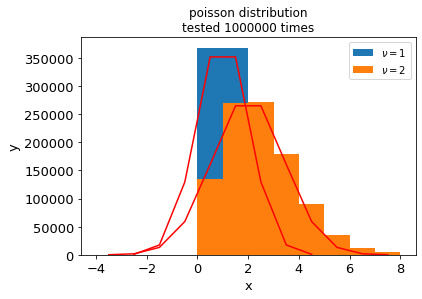

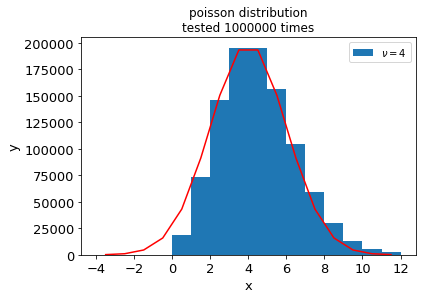

when nu=2 the difference is 0.14


In [21]:
# we start with one trial
n = 1
difference = plot_poisson_vs_gauss(n, plot=False)
# we use a while loop to find the right n
while difference > 0.2:
    n = n+1    # update counter
    difference = plot_poisson_vs_gauss(n, plot=False)
    print(f"when nu={n} the difference is {difference:.2f}")
   
# show legend and plot for loop
plt.legend()
plt.show()

# using the function again shows one distribution for a given n
difference = plot_poisson_vs_gauss(4, plot=True)
print(f"when nu={n} the difference is {difference:.2f}")


<hr style="font-family:width:100%;height:2px;color:black">

<font face="Times New Roman" size=3>
    <h3 style="margin:0px">Aufgabe 4: Zentraler Grenzwertsatz (8P)</h3>
</font>

Der Zentrale Grenzwertsatz besagt, dass die Summe von ausreichend vielen unabhängigen Zufallsvariablen aus der gleichen (aber beliebigen!) Wahrscheinlichkeitsdichtefunktion durch eine Gaussverteilung beschrieben werden kann. Um den zentralen Grenzwertsatz zu demonstrieren, sollen in dieser Übung mehrere im Intervall $[0,1]$ gleichverteilte Zufallsvariablen addiert werden, und mit einer Gausschen Wahrscheinlichkeitsdichtefunktion verglichen werden.

<font face="Times New Roman" size=4>
a) Zufallszahlen (1P)
</font>

Schreiben Sie zunächst eine Funktion, mit der Sie `NVar` Zufallszahlen im Intervall $[0,1]$ via der `numpy` Funktion `random.uniform` gezogen werden, und die Summe von diesen zurückgegeben wird. 

In [22]:
def sum_zufallszahl(NVar:int) -> float:
    return sum(np.random.uniform(0, 1, NVar))



<font face="Times New Roman" size=4>
b) Grenzwertsatz (5P)
</font>

In einer weiteren Funktion `grenzwertsatz` sollen $n$ Zufallszahlen, die die Summe von jeweils `NVar` gleichverteilten Zufallszahlen (Ihre Funktion in Teil (a)!) sind, in ein Histogramm eingetragen werden. Dieses Histogramm wieder mit einer Gaussverteilung verglichen werden. Darum soll in der neuen Funktion das Histogramm zusätzlich mit einer Gaussverteilung überlagert werden.  

*Bemerkung:* Hier machen wir uns jetzt das Leben leichter, indem wir das Histogram auf 1 normieren, und damit auch die Normierung der Gaussverteilung nicht mehr raten müssen. Das geht ganz einfach in dem man in der `hist` Funktion am Ende `density=True` einfügt. Für den Mittelwert und die Standardabweichung der Gaussverteilung die zum Vergleich verwendet wird koennen Sie einfach den Mittelwert und Standardabweichung des Histogramms ausrechnen. 

In [23]:
# Da wir hier $n$ Zufallszahlen verwenden, schreiben wir die Funktion aus Aufgabenteil a) um. Nämlich so, dass wir nicht nur eine Zahl sondern ein array gefüllt mit Zufallszahlen zurück bekommen. Das geht indem wir der Funktion np.random.uniform size=(Navr, n) übergeben. Und mit np.sum über axis=0 summieren. (Falls das unklar ist schau dir die Dokumentation von np.sum() an)
def sum_zufallszahl_array(NVar:int, n:int) -> np.ndarray:
    zufallszahl_array = np.random.uniform(0, 1, size=(NVar, n))
    return np.sum(zufallszahl_array, axis=0)


def MeanAndStdDev(values):
    # alternativ: mean = np.mean(values)
    mean = np.sum(values)/len(values)
    # alternativ var = np.var(values)
    diff = values - mean
    var = np.sum(diff*diff)/len(values)
    return mean, var


def diff(bh, bx, func) -> float:
    """ this function calculates the difference between a 
    histogram and a function"""
    d = 0
    for i in range(len(bh)):
        bmiddle = (bx[i+1]-bx[i]) / 2+bx[i] ## bin center along x axis
        d += abs(func(bmiddle) - bh[i]) 
    return d

In [24]:
def grenzwertsatz(n:int, NVar:int, plot:bool = True):
    nbins = NVar * 10
    bins  = [NVar*i/nbins for i in range(nbins+1)]
    # alternativ:
    #bins = np.linspace(0, NVar, nbins+1)

    #Fügen Sie hier Ihren Code ein
    
    # generiere Zufallszahlen array
    rvals = sum_zufallszahl_array(NVar, n)
    # plotte Zufallszahlenarray als Histogramm
    bh,bx,pt = plt.hist(rvals, bins=bins, 
                        density=True, label=f'NVar:{NVar}')
    # berechne Mittelwert und Standartabweichung
    mean, var = MeanAndStdDev(rvals)
    bins = np.asarray(bins)
    half_bin_width = (bins[1]-bins[0]) / 2
    xvals = bins[:-1] + half_bin_width
    yvals = gauss(xvals, 1, math.sqrt(var), mean)
    plt.plot(xvals, yvals, color='red')
    # berechne Differenz zwischen Zufallszahlenverteilung und Gauss
    func = lambda x: gauss(x, 1, math.sqrt(var), mean)
    # teile durch sum(yvals) um die relative Differenz zu erhalten
    difference = diff(bh, bx, func) / sum(yvals)

    # make plot nice
    plt.xlabel("x", fontsize=13)
    plt.ylabel("Anzahl normiert", fontsize=13)
    plt.xlim(np.min(bins), np.max(bins))
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    titel = (f'gleichverteilte Zufallszahlen'
                f'\nn={n}')
    plt.title(titel)

    ## show plot
    if plot:
        plt.legend()
        plt.show()
    #print(f"ymax = {ymax}")
    return difference


Starten Sie zunächst mit nur einer Zufallsvariablen (`NVar=1`). Erhöhen Sie nun die Anzahl schrittweise. Wieviele gleichverteilte Zufallsvariablen sollte man mindestens addieren, um eine gute Annäherung an die Gaussfunktion zu erhalten?

when Nvar=1 the difference is 0.33
when Nvar=2 the difference is 0.13
when Nvar=3 the difference is 0.16
when Nvar=4 the difference is 0.16
when Nvar=5 the difference is 0.11
when Nvar=6 the difference is 0.14
when Nvar=7 the difference is 0.16
when Nvar=8 the difference is 0.16
when Nvar=9 the difference is 0.16
when Nvar=10 the difference is 0.15


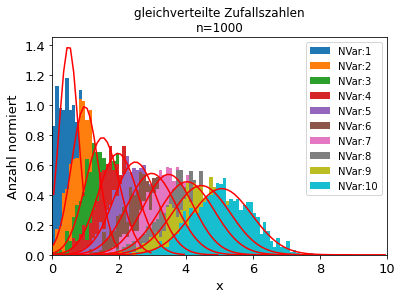

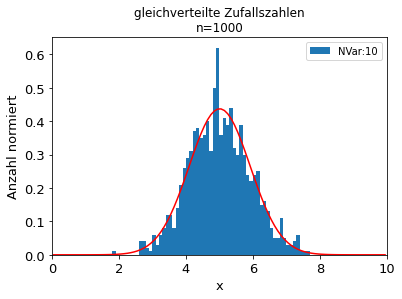

In [25]:
Nvar = 1
n = 1000
difference = grenzwertsatz(n, Nvar, plot=False)
print(f"when Nvar={Nvar} the difference is {difference:.2f}")

# use a while loop to find the right NVar
while difference > 0.1:
    Nvar = Nvar+1    # update counter
    difference = grenzwertsatz(n, Nvar, plot=False)
    print(f"when Nvar={Nvar} the difference is {difference:.2f}")
    
    # if you don't know if your data converges it is good to add a
    # break statement to a while loop
    if Nvar == 10:
        break

## show plot
# shows the histogramms and gaussian distributions for all the Nvar used in the loop
plt.legend()
plt.show()

# using the function again shows the distribution for a given Nvar
difference = grenzwertsatz(n, Nvar)


Man sollte mindestens zwei gleichverteilte Zufallsvariablen addieren.

<font face="Times New Roman" size=4>
c) Exponentialverteilung (2P)
</font>

Adaptieren Sie Ihre Funktionen aus Teil (a) und (b) insofern, dass Sie nun exponentiell-verteilte Zufallsvariablen generieren (mit der Zerfallskonstante $\mu = 0.3$) und den Grenzwertsatz ein weiteres mal verifizieren. Wie unterscheidet sich die benoetigte Stichprobengroesse fuer die Gleichverteilung und die Exponentialverteilung? 

In [26]:
def sum_zufallszahlExp_array(NVar, n, mu):
    return np.sum(np.random.exponential(1./mu, size=(NVar, n)), axis=0)

In [27]:
def grenzwertsatzExp(n:int, NVar:int, mu:float = 0.3, plot:bool = True):
    nbins = NVar * 5
    bins = np.linspace(0, NVar, nbins+1)
    if(mu<1.): 
        bins = np.linspace(0, NVar/0.1, nbins+1)
        #bins = [NVar/0.1*i/nbins for i in range(nbins+1)] 
    xmin = np.min(bins)
    xmax = np.max(bins)
    # generiere Zufallszahlen array
    rvals = sum_zufallszahlExp_array(NVar, n, mu)
    # plotte Zufallszahlenarray als Histogramm
    bh,bx,pt = plt.hist(rvals, bins=bins, 
                        density=True, label=f'NVar:{NVar}')
    # berechne Mittelwert und Standartabweichung für Gaussverteiung 
    mean, var = MeanAndStdDev(rvals)
    #print(mean,"  ",math.sqrt(var))
    # kreiere array mit Binmittelpunkten
    half_bin_width = (bins[1]-bins[0]) / 2
    xvals = bins[:-1] + half_bin_width
    # plotte normierten gauss
    yvals = gauss(xvals, 1, math.sqrt(var), mean)
    plt.plot(xvals, yvals, color='red')
    # berechne Differenz zwischen Zufallszahlenverteilung und Gauss   
    func = lambda x: gauss(x, 1, math.sqrt(var), mean)
    # teile durch sum(yvals) um die relative Differenz zu erhalten
    difference = diff(bh, bx, func) / sum(yvals)

    # make plot nice
    plt.xlabel("x", fontsize=13)
    plt.ylabel("Anzahl normiert", fontsize=13)
    plt.xlim(np.min(bins), np.max(bins))
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    titel = (f'exponentiell verteilte Zufallszahlen\n'
                fr'$\mu=${mu} n={n}')
    plt.title(titel)

    ## show plot
    if plot:
        plt.legend()
        plt.show()
    
    return difference




when Nvar=2 the difference is 0.33
when Nvar=3 the difference is 0.27
when Nvar=4 the difference is 0.25
when Nvar=5 the difference is 0.22
when Nvar=6 the difference is 0.21
when Nvar=7 the difference is 0.20


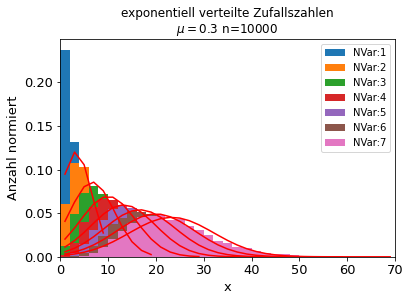

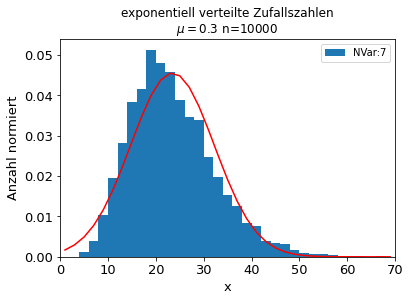

In [28]:
Nvar = 1
n = 10000
mu = 0.3
difference = grenzwertsatzExp(n, Nvar, mu, plot=False)

# use a while loop to find the right NVar
while difference > 0.2:
    Nvar = Nvar+1    # update counter
    difference = grenzwertsatzExp(n, Nvar, mu, plot=False)
    print(f"when Nvar={Nvar} the difference is {difference:.2f}")
    
    # if you don't know if your data converges it is good to add a
    # break statement to a while loop
    #if Nvar == 10:
    #    break

## show plot
# shows the histogramms and gaussian distributions for all the n used in the loop
plt.legend()
plt.show()

# using the function again shows the distribution for the last Nvar in the loop
difference = grenzwertsatzExp(n, Nvar)


Man muss mehr Zufallsvariablen addieren als bei der Gleichverteilung.